In [31]:
#importing the libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
#Creating the model:
recognizer = Sequential()

In [86]:
#Creating a convolutional and pooling layer
recognizer.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros', input_shape=(150, 150,3)))
recognizer.add(MaxPooling2D(pool_size=(2,2), padding='same'))   

#Creating a convolutional and pooling layer
recognizer.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
recognizer.add(MaxPooling2D(pool_size=(2,2), padding='same'))        
                                         
#Creating a convolutional and pooling layer
recognizer.add(Convolution2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
recognizer.add(MaxPooling2D(pool_size=(2,2), padding='same'))                                      
                                           
#Transforming the pooling layer into a vector where each vector vlue = neuron
recognizer.add(Flatten())
        
#Creating the Artificial Neural Network
recognizer.add(Dense(input_dim = 128, units=128, activation='relu'))
recognizer.add(Dense(input_dim =64, units= 1, activation='sigmoid'))

#Compiling the Neural Network
recognizer.compile(optimizer = "adagrad" , loss="binary_crossentropy" , metrics=['accuracy'])

In [87]:
model_name = "3_conv2D_x_1_dense_128_64_adagrad"

In [88]:
tensorboard = tf.keras.callbacks.TensorBoard(
                        log_dir="logs\{}".format(model_name),
                        histogram_freq=0,
                        write_graph=True,
                        write_images=False,
                        update_freq="epoch",
                        profile_batch=2,
                        embeddings_freq=0,
                        embeddings_metadata=None,
                )

In [89]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
                                    
training_set = train_datagen.flow_from_directory('sets/train',
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary') 

Found 5217 images belonging to 2 classes.


In [90]:
test_datagen = ImageDataGenerator(rescale=1./255)

testing_set = test_datagen.flow_from_directory('sets/test',
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary') 

Found 639 images belonging to 2 classes.


In [91]:
recognizer.fit(
            training_set,
            epochs=10,
            callbacks=[tensorboard],
            validation_data=testing_set,
            )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 164 steps, validate for 20 steps
Epoch 1/10
164/164 [==============================] - 84s 515ms/step - loss: 0.4945 - accuracy: 0.7587 - val_loss: 0.5382 - val_accuracy: 0.7246
Epoch 2/10
164/164 [==============================] - 85s 516ms/step - loss: 0.3693 - accuracy: 0.8284 - val_loss: 0.6395 - val_accuracy: 0.7230
Epoch 3/10
164/164 [==============================] - 85s 515ms/step - loss: 0.3340 - accuracy: 0.8457 - val_loss: 0.4449 - val_accuracy: 0.8200
Epoch 4/10
164/164 [==============================] - 84s 514ms/step - loss: 0.3087 - accuracy: 0.8679 - val_loss: 0.4188 - val_accuracy: 0.8357
Epoch 5/10
164/164 [==============================] - 84s 511ms/step - loss: 0.2844 - accuracy: 0.8766 - val_loss: 0.4381 - val_accuracy: 0.8404
Epoch 6/10
164/164 [==============================] - 84s 514ms/step - loss: 0.2752 - accuracy: 0.8825 - val_loss: 0.3622 - val_accuracy: 0.8576
Epoch 7/10
164/164 [=================

In [92]:
test_accu = recognizer.evaluate(testing_set,steps=20)

  ...
    to  
  ['...']
20/20 [==============================] - 7s 328ms/step - loss: 0.3579 - accuracy: 0.8607


In [93]:
print("Model's Accuracy is: ", int(test_accu[1]*100),"%")
print("Model's Loss is: ", int(test_accu[0]*100),"%")

Model's Accuracy is:  86 %
Model's Loss is:  35 %


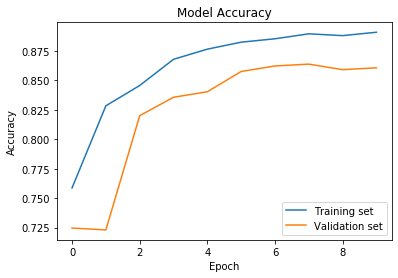

In [94]:
# Accuracy 
fig, ax = plt.subplots(1,1)
ax.plot(recognizer.history.history['accuracy'])
ax.plot(recognizer.history.history['val_accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Training set', 'Validation set'], loc='lower right')
fig.savefig("{}_Accuracy.png".format(model_name))

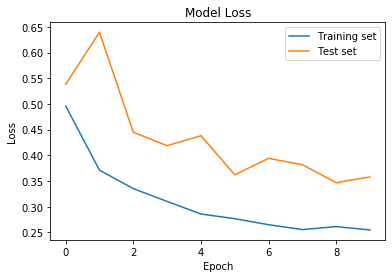

In [95]:
fig, ax = plt.subplots(1,1)
ax.plot(recognizer.history.history['loss'])
ax.plot(recognizer.history.history['val_loss'])
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Training set', 'Test set'], loc='upper right')
fig.savefig("{}_loss.png".format(model_name))

In [96]:
recognizer.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 23104)            

In [97]:
from contextlib import redirect_stdout

with open('modelsummary.txt', 'w') as f:
    with redirect_stdout(f):
        recognizer.summary()